In [2]:
import pandas as pd
import numpy as np
from osprey.config import Config
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
frac_min, frac_max = 0.005, 1
fractions = [x for x in np.logspace(np.log10(frac_min), np.log10(frac_max), 5)]
result_dirs = ['data/{:05.1f}pc'.format(x*100) for x in fractions]

all_dfs = []
for i, result_dir in enumerate(result_dirs): 
    df = Config(join(result_dir, 'config.yaml')).trial_results()
    df['data_fraction'] = fractions[i]
    all_dfs.append(df)
    
df = pd.concat(all_dfs)
# i = 0
# result_dir = result_dirs[i]
# df = Config(join(result_dir, 'config-shuffle.yaml')).trial_results()
# df['data_fraction'] = fractions[i]

Loading config file:     data/000.5pc/config.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     data/001.9pc/config.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     data/007.1pc/config.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     data/026.6pc/config.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     data/100.0pc/config.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [4]:
df = df.loc[df['project_name']=='shuffle', :]
df.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,data_fraction
1500,2017-12-13 11:20:47.223980,fae34f52b58ab94a64f86c5cee62fcb5479d9592,1970-01-01 00:00:00.612122,compute108.bc4.acrc.priv,1501,1.972167,1.977351,"[21100, 21100, 21100, 21100, 21100]","[21100, 21100, 21100, 21100, 21100]","{'msm__score_method': 'vamp1', 'msm__dt_traj':...",shuffle,2017-12-13 11:20:46.611858,SUCCEEDED,"[1.9786916309779874, 1.9701624047326693, 1.973...",None,"[1.9717298662663505, 1.9766365010045606, 1.977...",ra15808,0.005
1501,2017-12-13 11:20:47.722237,fae34f52b58ab94a64f86c5cee62fcb5479d9592,1970-01-01 00:00:00.380345,compute108.bc4.acrc.priv,1502,1.954158,1.947669,"[21100, 21100, 21100, 21100, 21100]","[21100, 21100, 21100, 21100, 21100]","{'msm__score_method': 'vamp2', 'msm__dt_traj':...",shuffle,2017-12-13 11:20:47.341892,SUCCEEDED,"[1.9545300573395832, 1.9546398436638561, 1.950...",None,"[1.9480156723833641, 1.947658748861126, 1.9514...",ra15808,0.005
1502,2017-12-13 11:20:48.217765,fae34f52b58ab94a64f86c5cee62fcb5479d9592,1970-01-01 00:00:00.380307,compute108.bc4.acrc.priv,1503,1.850790,1.946740,"[21100, 21100, 21100, 21100, 21100]","[21100, 21100, 21100, 21100, 21100]","{'msm__score_method': 'vampe', 'msm__dt_traj':...",shuffle,2017-12-13 11:20:47.837458,SUCCEEDED,"[1.8298061027040595, 1.9557670833703877, 1.895...",None,"[1.9384630860352805, 1.9459052722702648, 1.946...",ra15808,0.005
1503,2017-12-13 11:20:48.690915,fae34f52b58ab94a64f86c5cee62fcb5479d9592,1970-01-01 00:00:00.357671,compute108.bc4.acrc.priv,1504,2.768637,2.766196,"[21100, 21100, 21100, 21100, 21100]","[21100, 21100, 21100, 21100, 21100]","{'msm__score_method': 'vamp1', 'msm__dt_traj':...",shuffle,2017-12-13 11:20:48.333244,SUCCEEDED,"[2.7689383581606313, 2.757427610144052, 2.7659...",None,"[2.7727444050869696, 2.7768785192978505, 2.784...",ra15808,0.005
1504,2017-12-13 11:20:49.157957,fae34f52b58ab94a64f86c5cee62fcb5479d9592,1970-01-01 00:00:00.352274,compute108.bc4.acrc.priv,1505,2.576974,2.599408,"[21100, 21100, 21100, 21100, 21100]","[21100, 21100, 21100, 21100, 21100]","{'msm__score_method': 'vamp2', 'msm__dt_traj':...",shuffle,2017-12-13 11:20:48.805683,SUCCEEDED,"[2.539789405876631, 2.5462250502779376, 2.6197...",None,"[2.642081625887244, 2.630196735095659, 2.55682...",ra15808,0.005


In [5]:
df.head()
df.tail()
df.reset_index(inplace=True)
df.shape

(7500, 19)

In [6]:
df = df.loc[:, ['parameters', 'test_scores', 'train_scores', 'data_fraction']]

In [7]:
static_params = df.loc[0, 'parameters']
static_params

{'cluster__max': 1.2,
 'cluster__min': -1.2,
 'cluster__n_bins_per_feature': 10,
 'msm__connectivity': 'largest',
 'msm__count_mode': 'sliding',
 'msm__dt_traj': '1 step',
 'msm__lag': 25,
 'msm__maxerr': 1e-08,
 'msm__maxiter': 1000000,
 'msm__mincount_connectivity': '1/n',
 'msm__reversible': True,
 'msm__score_k': 2,
 'msm__score_method': 'vamp1',
 'msm__sparse': False,
 'msm__statdist_constraint': None}

In [8]:
variables = ['msm__score_k', 'msm__score_method', 'cluster__n_bins_per_feature']
for variable in variables: 
    df[variable] = df['parameters'].apply(lambda x: x[variable])
del df['parameters']

In [9]:
for x in ['test', 'train']:
    df[x+'_scores_std'] = df[x+'_scores'].apply(lambda x: np.std(x))
    df[x+'_scores_median'] = df[x+'_scores'].apply(lambda x: np.median(x))
    del df[x+'_scores']

In [10]:
df['t2_fraction'] = df['data_fraction'].apply(lambda x: '{:4.2f}'.format(x*10))
df['t2_fraction'].unique()

array(['0.05', '0.19', '0.71', '2.66', '10.00'], dtype=object)

In [11]:

df.rename(columns={'msm__score_k': 'k', 'msm__score_method': 'method','cluster__n_bins_per_feature': 'clusters'}, 
         inplace=True)
df.head()


,data_fraction,k,method,clusters,test_scores_std,test_scores_median,train_scores_std,train_scores_median,t2_fraction
0,0.005,2,vamp1,10,0.003679,1.970459,0.003328,1.977300,0.05
1,0.005,2,vamp2,10,0.009459,1.954530,0.009858,1.948016,0.05
2,0.005,2,vampe,10,0.069833,1.829806,0.007373,1.945905,0.05
3,0.005,3,vamp1,10,0.010953,2.765954,0.015193,2.772744,0.05
4,0.005,3,vamp2,10,0.029915,2.589220,0.032197,2.591849,0.05


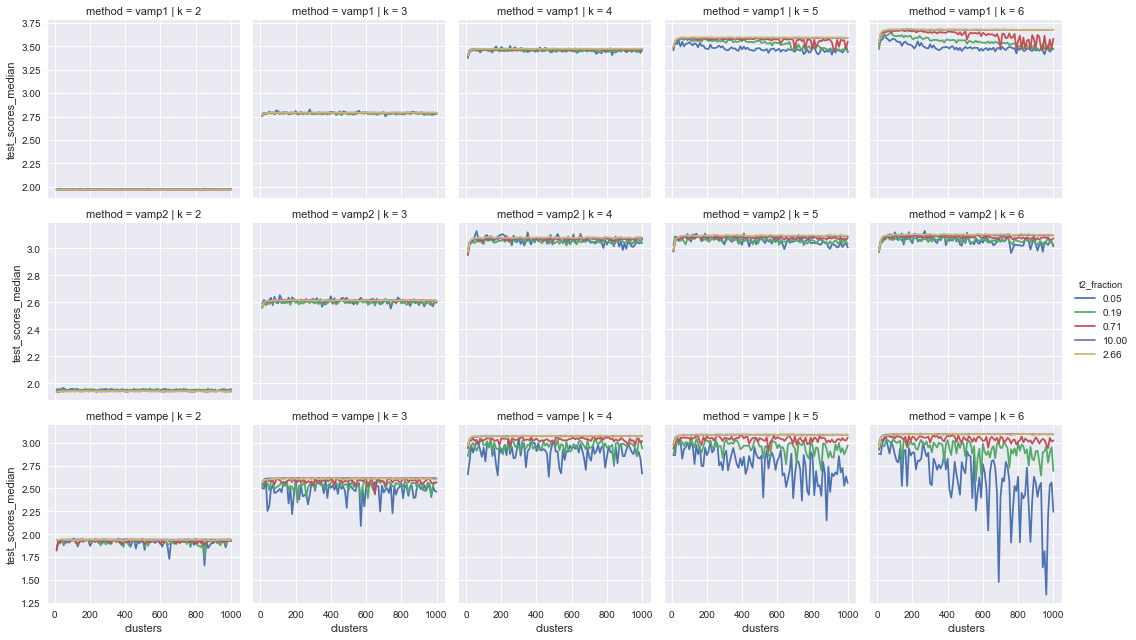

In [17]:
# cols = sns.color_palette('colorblind')
g = sns.FacetGrid(data=df, row='method', col='k', hue='t2_fraction', sharey='row')
g.map(plt.plot, 'clusters', 'test_scores_median', alpha=1).add_legend()
# g.map(plt.plot, 'clusters', 'train_scores_mean', alpha=1, color=cols[1])

In [19]:
best_idx = df.groupby(['data_fraction',  
                       'method', 'k'])['test_scores_median'].transform(max) == df['test_scores_median']

best_df = df.loc[best_idx, :].sort_values(by=['data_fraction',  'method', 'k'])
best_df.head()

,data_fraction,k,method,clusters,test_scores_std,test_scores_median,train_scores_std,train_scores_median,t2_fraction
30,0.005,2,vamp1,30,0.002805,1.981463,0.003178,1.972475,0.05
408,0.005,3,vamp1,280,0.035767,2.826051,0.028691,2.764272,0.05
366,0.005,4,vamp1,250,0.030479,3.504578,0.027704,3.453209,0.05
54,0.005,5,vamp1,40,0.030907,3.554596,0.030544,3.600176,0.05
57,0.005,6,vamp1,40,0.022972,3.626593,0.023442,3.690757,0.05


## k=4 only

In [20]:
df.loc[df['k']==4, :].head()

,data_fraction,k,method,clusters,test_scores_std,test_scores_median,train_scores_std,train_scores_median,t2_fraction
6,0.005,4,vamp1,10,0.028828,3.399093,0.023742,3.399425,0.05
7,0.005,4,vamp2,10,0.046026,2.981422,0.047419,3.001739,0.05
8,0.005,4,vampe,10,0.256823,2.654272,0.026200,2.999480,0.05
21,0.005,4,vamp1,20,0.025012,3.460883,0.025911,3.439837,0.05
22,0.005,4,vamp2,20,0.044251,3.048747,0.032043,3.077133,0.05


In [21]:
methods = df['method'].unique()
t2_fracs = df['t2_fraction'].unique()


In [22]:
k = 4
df_sample = df.loc[df['k']==k, :]
best_df_sample = best_df.loc[df['k']==k, :]
cols = sns.color_palette('colorblind', 3)


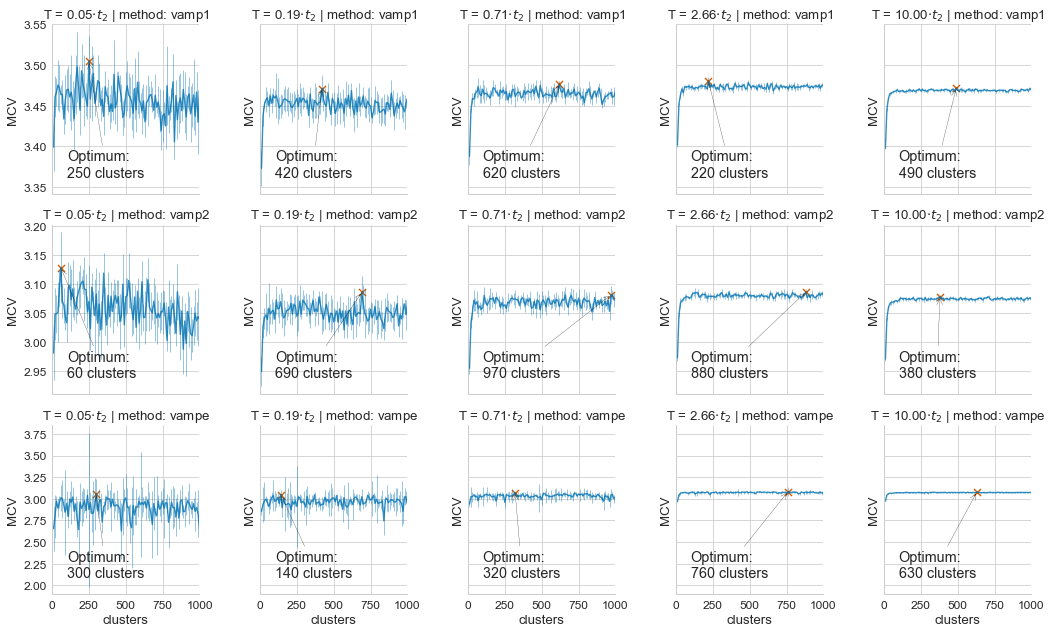

In [25]:
with sns.plotting_context('paper', font_scale=1.5):
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data=df_sample,  col='t2_fraction', row='method', col_order=t2_fracs,
                      row_order=methods, sharey='row')
    g.map(plt.errorbar, 'clusters', 'test_scores_median', 'test_scores_std', 
          alpha=0.8, color=cols[0], elinewidth=.5)
#     g.map(plt.errorbar, 'clusters', 'test_scores_mean', 
#           alpha=0.8, color=cols[0])
     
    g.set_titles('T = {col_name}$ \cdot t_2$ | method: {row_name}' )
    g.set(ylabel='MCV', xlim=(0,1000))
    for i in range(g.axes.shape[0]):
        for j in range(g.axes.shape[1]):
            ax = g.axes[i][j]
            idx = (best_df_sample['method']==methods[i]) & (best_df_sample['data_fraction']==fractions[j])
                
            x = best_df_sample.loc[idx, 'clusters']
            y = best_df_sample.loc[idx, 'test_scores_median']
            ax.scatter(x, y, c=cols[-1], marker='x', s=50)
            
            label = 'Optimum:\n{} clusters'.format(x.values[0])
            ax.annotate(label,
                    xy=(x, y), xycoords='data',
                    xytext=(.1, .1),  textcoords='axes fraction', 
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc3"),
                    )

    plt.savefig('figures/shuffle_k4_with_errors.png', transparent=True)
# g.map(plt.errorbar, 'cluster__n_bins_per_feature', 'train_scores_mean','train_scores_std',  alpha=1, color=cols[1])

## m = 90 

In [35]:
m = 90
df_sample = df.loc[df['clusters']==m, :]
df_sample.loc[df_sample['method']=='vampe', :].head()

,data_fraction,k,method,clusters,test_scores_std,test_scores_median,train_scores_std,train_scores_median,t2_fraction
122,0.005,2,vampe,90,0.048500,1.929572,0.002638,1.952658,0.05
125,0.005,3,vampe,90,0.210094,2.460105,0.032007,2.629477,0.05
128,0.005,4,vampe,90,0.491921,2.845942,0.030287,3.059474,0.05
131,0.005,5,vampe,90,0.044536,3.003590,0.022917,3.111846,0.05
134,0.005,6,vampe,90,0.057009,2.955797,0.034223,3.148937,0.05


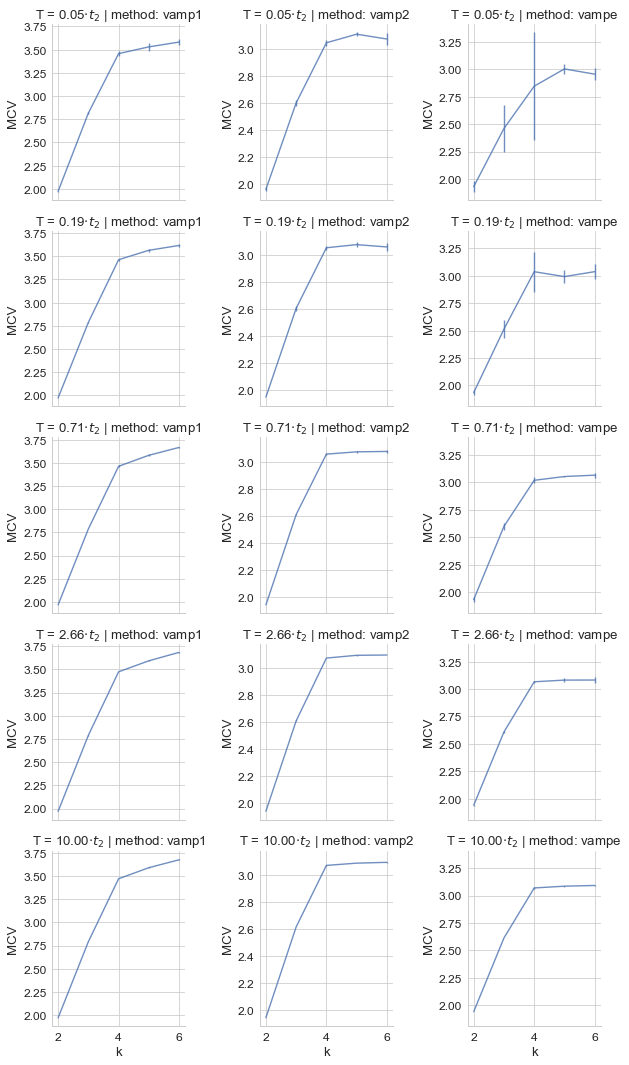

In [38]:
with sns.plotting_context('paper', font_scale=1.5):
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data=df_sample,  row='t2_fraction', col='method', col_order=methods,
                      row_order=t2_fracs, sharey='col')
#     g.map(plt.errorbar, 'clusters', 'test_scores_mean', 'test_scores_std', 
#           alpha=0.8, color=cols[0], elinewidth=.5)
    g.map(plt.errorbar, 'k', 'test_scores_median', 'test_scores_std',
          alpha=0.8)
     
    g.set_titles('T = {row_name}$ \cdot t_2$ | method: {col_name}' )
    g.set(ylabel='MCV')
#     for i in range(g.axes.shape[0]):
#         for j in range(g.axes.shape[1]):
#             ax = g.axes[i][j]
#             idx = (best_df_sample['method']==methods[j]) & (best_df_sample['data_fraction']==fractions[i])
                
#             x = best_df_sample.loc[idx, 'clusters']
#             y = best_df_sample.loc[idx, 'test_scores_mean']
#             ax.scatter(x, y, c=cols[-1], marker='x', s=50)
            
#             label = 'Optimum:\n{} clusters'.format(x.values[0])
#             ax.annotate(label,
#                     xy=(x, y), xycoords='data',
#                     xytext=(.1, .1),  textcoords='axes fraction', 
#                     arrowprops=dict(arrowstyle="->",
#                                     connectionstyle="arc3"),
#                     )

#     plt.savefig('m90.pdf')
# g.map(plt.errorbar, 'cluster__n_bins_per_feature', 'train_scores_mean','train_scores_std',  alpha=1, color=cols[1])

In [116]:
# best_df_sample = best_df.loc[df['m']==k, :]
